In [13]:
import pandas as pd
df = pd.read_parquet(r"C:\Users\user\PycharmProjects\Home-work-2-0\data_processed.parquet")
df.head
#Здесь выполняется загрузка предварительно обработанного датасета в формате Parquet. Parquet — это быстрый и эффективный формат хранения табличных данных, оптимизированный для анализа.

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [14]:
#2. Оценка структуры данных
print(df.info())
print(df.describe(include='all'))
print("Количество строк и колонок:", df.shape)
print("Колонки:", df.columns.tolist())
#df.info() — выводит список всех столбцов, их типы, количество непустых значений.
#df.describe(include='all') — вычисляет основные статистики по всем столбцам (среднее, min/max, уникальные значения) — показывает диапазоны и вариативность, помогает заметить странности.
#df.shape — число строк и столбцов, сразу оценивает размер выборки.
#df.columns.tolist() — перечень всех признаков — удобно для ориентации в датасете.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [15]:
#3. Оценка целостности и полноты данных
print(df.isnull().sum())
print(df.notnull().mean())
#df.isnull().sum() — считает количество пропусков (отсутствующих данных) по каждому столбцу.
#df.notnull().mean() — вычисляет долю заполненных значений для каждого признака, чтобы оценить полноту данных.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
#4. Оценка выбросов и аномалий
for col in df.select_dtypes("number"):
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    outliers = df[(df[col] < q_low) | (df[col] > q_high)]
    print(f"{col}: выбросов {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
#Для каждого числового столбца смотрим 1-й и 99-й процентили — так оцениваем “нормальный” диапазон данных.
#Значения, выходящие за эти границы, считаются выбросами (аномалиями), их количество и процент выводятся по каждому признаку.

#Вывод:
#Это помогает понять, есть ли у каких-то признаков подозрительно необычные значения, которые могут повлиять на анализ и результаты, например ошибки ввода, нетипичные случаи.

Age: выбросов 23 (1.56%)
DailyRate: выбросов 26 (1.77%)
DistanceFromHome: выбросов 0 (0.00%)
Education: выбросов 0 (0.00%)
EmployeeCount: выбросов 0 (0.00%)
EmployeeNumber: выбросов 30 (2.04%)
EnvironmentSatisfaction: выбросов 0 (0.00%)
HourlyRate: выбросов 0 (0.00%)
JobInvolvement: выбросов 0 (0.00%)
JobLevel: выбросов 0 (0.00%)
JobSatisfaction: выбросов 0 (0.00%)
MonthlyIncome: выбросов 30 (2.04%)
MonthlyRate: выбросов 30 (2.04%)
NumCompaniesWorked: выбросов 0 (0.00%)
PercentSalaryHike: выбросов 0 (0.00%)
PerformanceRating: выбросов 0 (0.00%)
RelationshipSatisfaction: выбросов 0 (0.00%)
StandardHours: выбросов 0 (0.00%)
StockOptionLevel: выбросов 0 (0.00%)
TotalWorkingYears: выбросов 24 (1.63%)
TrainingTimesLastYear: выбросов 0 (0.00%)
WorkLifeBalance: выбросов 0 (0.00%)
YearsAtCompany: выбросов 13 (0.88%)
YearsInCurrentRole: выбросов 13 (0.88%)
YearsSinceLastPromotion: выбросов 13 (0.88%)
YearsWithCurrManager: выбросов 14 (0.95%)


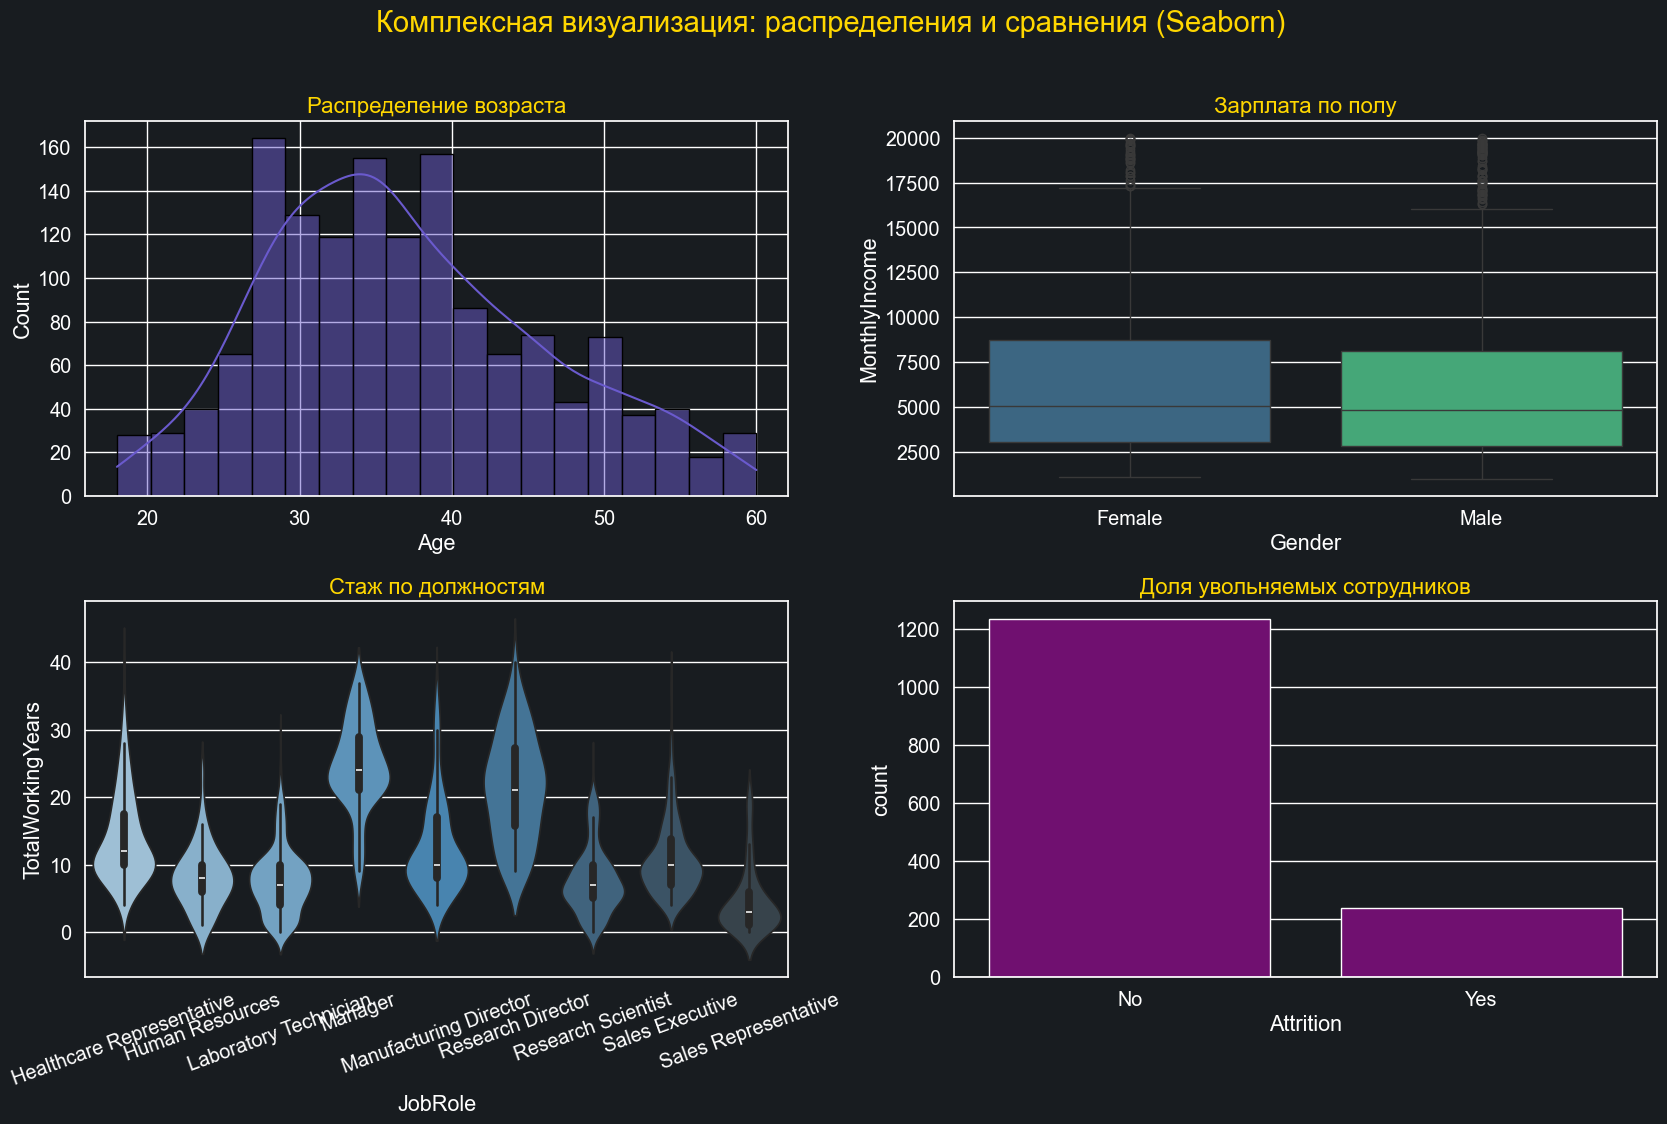

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="darkgrid",
    palette="dark:#5A9_r",
    font_scale=1.3,
    rc={"axes.facecolor": "#181c20", "figure.facecolor": "#181c20"}
)

fig, axes = plt.subplots(2, 2, figsize=(17, 12))

# 1. Гистограмма возраста
sns.histplot(df['Age'], kde=True, ax=axes[0,0], color='slateblue', edgecolor='black')
axes[0,0].set_title("Распределение возраста", color='#FFD700', fontsize=16)

# 2. Boxplot доходов по полу
sns.boxplot(x='Gender', y='MonthlyIncome', data=df, ax=axes[0,1], hue='Gender', palette="viridis", legend=False)
axes[0,1].set_title("Зарплата по полу", color='#FFD700', fontsize=16)

# 3. Violinplot стажа по категориям должности
sns.violinplot(
    x="JobRole", y="TotalWorkingYears", data=df, ax=axes[1,0],
    hue="JobRole", palette="Blues_d", density_norm="width", legend=False
)
axes[1,0].set_title("Стаж по должностям", color='#FFD700', fontsize=16)
axes[1,0].tick_params(axis='x', rotation=20, colors='white')

# 4. Countplot по статусу увольнения
sns.countplot(x="Attrition", data=df, ax=axes[1,1], color="purple")
axes[1,1].set_title("Доля увольняемых сотрудников", color='#FFD700', fontsize=16)

# Общие настройки для всего окна графиков
fig.suptitle("Комплексная визуализация: распределения и сравнения (Seaborn)", fontsize=21, color='#FFD700')
plt.tight_layout(rect=[0, 0.04, 1, 0.97])
for ax in axes.flat:
    ax.set_facecolor("#181c20")
    ax.title.set_color('#FFD700')
    ax.xaxis.label.set_color("white")
    ax.yaxis.label.set_color("white")
    ax.tick_params(colors='white')

plt.show()

#Комментарий:
#В этой set grid — четыре разных графика (распределения, сравнения, группировки)! Всё в единой палитре и общем стиле, крупный шрифт, темный фон.